In [1]:
import pandas as pd
import numpy as np
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train_data.shape

(54808, 14)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train_data.education.isnull().sum()

2409

In [6]:
def fill_missing(df, column, value):
    df_copy = df.copy()
    df_copy[column].fillna(value=value,inplace=True)
    return df_copy

train_data = fill_missing(train_data, "education", "others")
test_data = fill_missing(test_data, "education", "others")

train_data = fill_missing(train_data, "previous_year_rating", 0.0)
test_data = fill_missing(test_data, "previous_year_rating", 0.0)

In [7]:
train_data.department.value_counts()

Sales & Marketing    16840
Operations           11348
Procurement           7138
Technology            7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [8]:
train_data.education.value_counts()

Bachelor's          36669
Master's & above    14925
others               2409
Below Secondary       805
Name: education, dtype: int64

In [9]:
train_data.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [10]:
train_data.recruitment_channel.value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [11]:
# Convert 'object' columns into categorical datatype

def convert_to_category(df, column_list):
    df_copy = df.copy()
    df_copy[column_list] = df_copy[column_list].apply(lambda x: x.astype('category'))
    return df_copy

train_data = convert_to_category(train_data, ['department','region','education','gender','recruitment_channel'])
test_data = convert_to_category(test_data, ['department','region','education','gender','recruitment_channel'])

In [12]:
# Check if there is any duplicate employee ID
# Could also use df.duplicated().sum()

condition = bool(train_data.duplicated(subset = 'employee_id').any())

if condition:
    print('There are duplicate employee IDs')
else:
    print('No duplicate employee IDs')

No duplicate employee IDs


In [13]:
type(train_data.isnull().sum())

pandas.core.series.Series

In [14]:
test_data.isnull().sum().to_dict()

{'employee_id': 0,
 'department': 0,
 'region': 0,
 'education': 0,
 'gender': 0,
 'recruitment_channel': 0,
 'no_of_trainings': 0,
 'age': 0,
 'previous_year_rating': 0,
 'length_of_service': 0,
 'KPIs_met >80%': 0,
 'awards_won?': 0,
 'avg_training_score': 0}

In [15]:
train_data.corr

<bound method DataFrame.corr of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
5            58896          Analytics   region_2        Bachelor's      m   
6            20379         Operations  region_20        Bachelor's      f   
7            16290         Operations  region_34  Master's & above      m   
8            73202          Analytics  region_20        Bachelor's      m   
9            28911  Sales & Marketing   region_1  Master's & above      m   
10           29934         Technology  region_23            others      m   
11           49017  Sales & Marketing   regi

In [16]:
train_data.isna()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
df = pd.read_csv('train.csv')

In [18]:
df.columns


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [19]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cmap = 'Blues_r')

In [20]:
df.corr()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,1.000000,-0.005121,0.000437,0.004533,0.001274,-0.002501,0.008420,-0.000586,0.001206
no_of_trainings,-0.005121,1.000000,-0.081278,-0.063126,-0.057275,-0.045576,-0.007628,0.042517,-0.024896
age,0.000437,-0.081278,1.000000,0.006008,0.657111,-0.025592,-0.008169,-0.048380,-0.017166
previous_year_rating,0.004533,-0.063126,0.006008,1.000000,0.000253,0.351578,0.027738,0.075139,0.159320
length_of_service,0.001274,-0.057275,0.657111,0.000253,1.000000,-0.077693,-0.039927,-0.038122,-0.010670
KPIs_met >80%,-0.002501,-0.045576,-0.025592,0.351578,-0.077693,1.000000,0.097000,0.078391,0.221582
awards_won?,0.008420,-0.007628,-0.008169,0.027738,-0.039927,0.097000,1.000000,0.072138,0.195871
avg_training_score,-0.000586,0.042517,-0.048380,0.075139,-0.038122,0.078391,0.072138,1.000000,0.181147
is_promoted,0.001206,-0.024896,-0.017166,0.159320,-0.010670,0.221582,0.195871,0.181147,1.000000


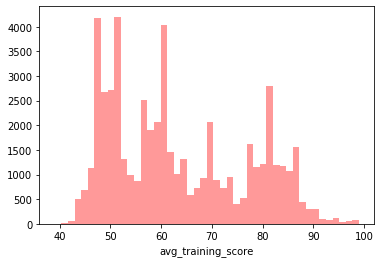

In [21]:
sns.distplot(df['avg_training_score'].dropna(),kde=False,color='r')

In [22]:
df.sort_values(by='age',ascending=False)[['employee_id','awards_won?','avg_training_score']].head(10)

,employee_id,awards_won?,avg_training_score
25279,34086,0,68
52583,73042,0,52
48001,51246,0,58
30863,50432,0,64
9985,14505,0,43
23252,72835,0,47
3133,16856,1,49
3808,64517,0,61
45288,51171,0,51
38583,63227,0,79


In [23]:
df.dropna(inplace = True)
df

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


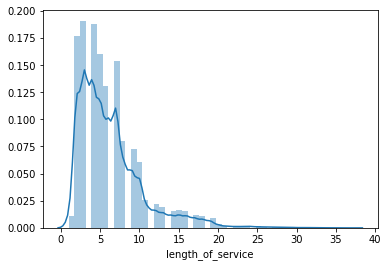

In [24]:
sns.distplot(df['length_of_service'].dropna())

In [25]:
print("Mean: ", df['age'].mean())

Mean:  35.58943690916564


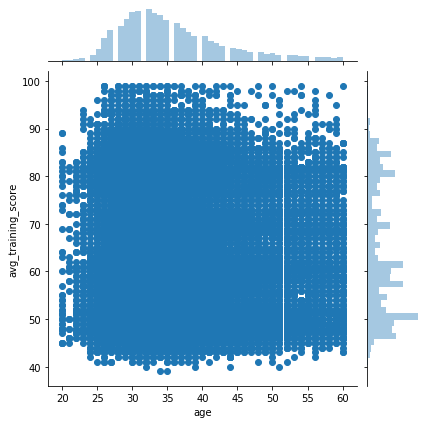

In [26]:
sns.jointplot(x='age',y='avg_training_score',data=df)

In [27]:
print("Standard Deviation: \n", df.std())

Standard Deviation: 
 employee_id             22630.461554
no_of_trainings             0.604994
age                         7.534571
previous_year_rating        1.257922
length_of_service           4.204760
KPIs_met >80%               0.478962
awards_won?                 0.150350
avg_training_score         13.273502
is_promoted                 0.281795
dtype: float64


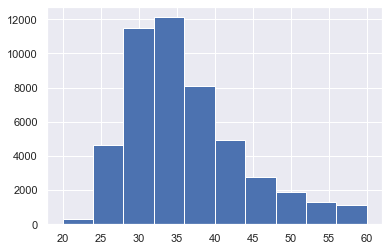

In [28]:
import seaborn as sns 
sns.set()
df['age'].hist(bins = 10)

Mean age:  35.58943690916564
Standard Deviation in age:  7.534571015323289


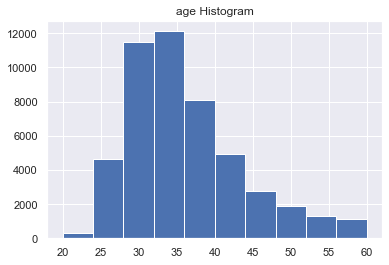

In [29]:
import seaborn as sns 
import matplotlib.pyplot as plt
def get_statistics(numeric_column_name):
    print("Mean {}: ".format(numeric_column_name),   df[numeric_column_name].mean())
    print("Standard Deviation in {}: ".format(numeric_column_name), df[numeric_column_name].std())
    sns.set()
    plt.title("{} Histogram".format(numeric_column_name))
    df[numeric_column_name].hist(bins = 10)
    
get_statistics('age')

Mean previous_year_rating:  3.3375256884504725
Standard Deviation in previous_year_rating:  1.2579223704691407


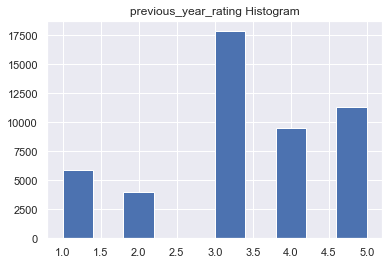

In [30]:
get_statistics('previous_year_rating')

In [31]:
from collections import Counter
print(Counter(df['previous_year_rating'].values))

Counter({3.0: 17867, 5.0: 11362, 4.0: 9509, 1.0: 5887, 2.0: 4035})


In [32]:
print(Counter(df['department'].values).most_common(5))

[('Sales & Marketing', 14239), ('Operations', 10547), ('Procurement', 6641), ('Technology', 6502), ('Analytics', 4610)]


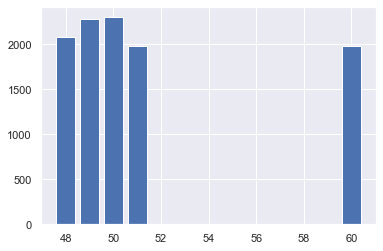

In [33]:
bar_plot = dict(Counter(df['avg_training_score'].values).most_common(5))
plt.bar(*zip(*bar_plot.items()))
plt.show()




In [34]:
def plot_most_common(category):
    bar_plot = dict(Counter(df[category].values).most_common(5))
    plt.bar(*zip(*bar_plot.items()))
    plt.show()

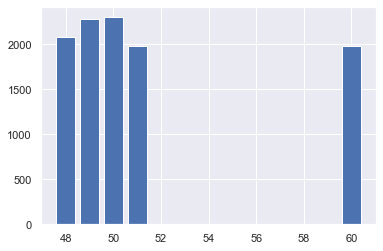

In [35]:
plot_most_common('avg_training_score')

In [36]:
df['age'] = df['age'].astype(int)

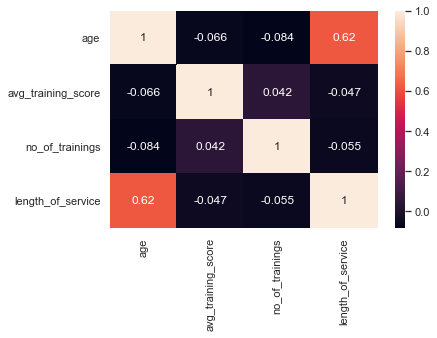

In [37]:
numerical_columns = df[['age', 'avg_training_score', 'no_of_trainings', 'length_of_service']]
sns.heatmap(numerical_columns.corr(), annot=True)
plt.show()

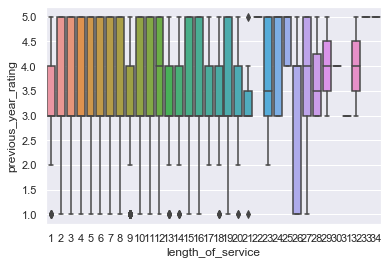

In [38]:
df = df[df['department'].isin(['HR', 'Finance', 'Analytics'])]
sns.boxplot(x= df['length_of_service'], y = df['previous_year_rating'])
plt.show()

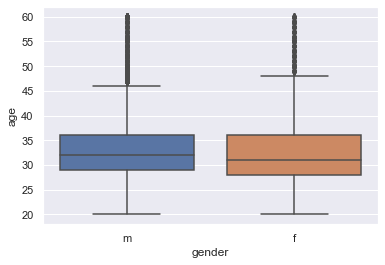

In [39]:
sns.boxplot(x= df['gender'], y = df['age'])
plt.show()

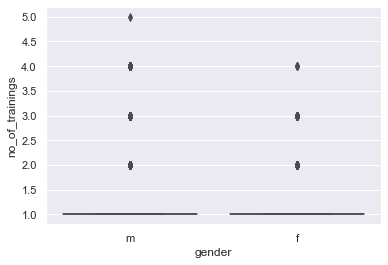

In [40]:
sns.boxplot(x= df['gender'], y = df['no_of_trainings'])
plt.show()

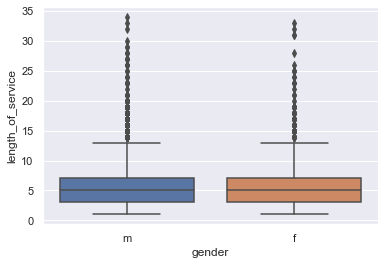

In [41]:
sns.boxplot(x= df['gender'], y = df['length_of_service'])
plt.show()

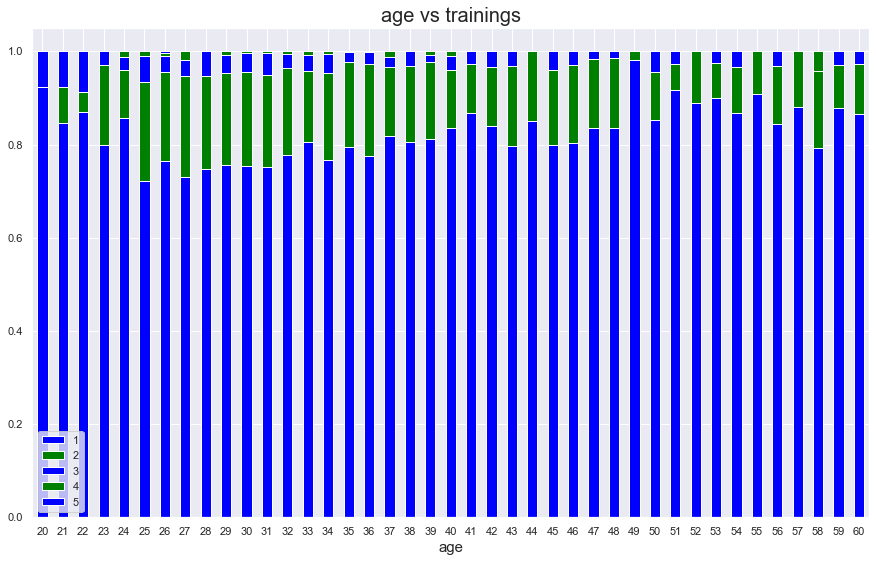

In [42]:
promotion = pd.crosstab(df['age'], df['no_of_trainings'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(15, 9), color=['blue', 'green'])
plt.title('age vs trainings', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('age', fontsize=15)
plt.legend()
plt.show()

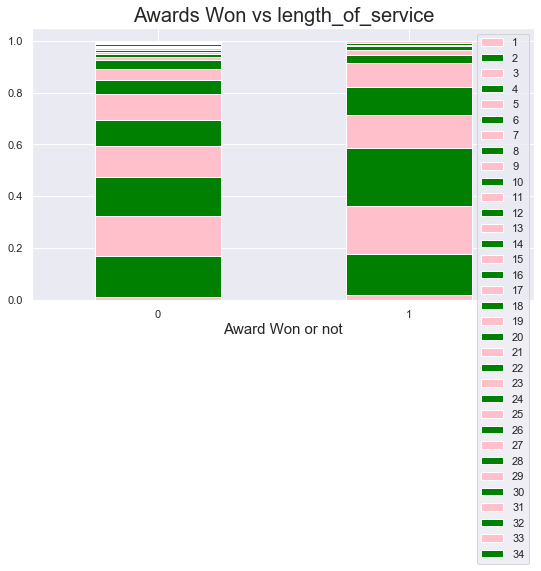

In [43]:
promotion = pd.crosstab(df['awards_won?'], df['length_of_service'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(9, 5), color=['pink', 'green'])
plt.title('Awards Won vs length_of_service', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('Award Won or not', fontsize=15)
plt.legend()
plt.show()

In [44]:
train_data.is_promoted.value_counts(normalize=True)

0    0.91483
1    0.08517
Name: is_promoted, dtype: float64

In [45]:
train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.078748,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.496458,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,0.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,2.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [46]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    promo_by_group = pd.crosstab(index=train_data['is_promoted'],columns = train_data[column_name], normalize = 'columns')
    promo_by_group = promo_by_group.apply(lambda x: round(x,2))
    
    labels = promo_by_group.columns
    list1 = promo_by_group.iloc[0].to_list()
    list2 = promo_by_group.iloc[1].to_list()
    
    list1_name = "Not promoted"
    list2_name = "Promoted"
    title = f"Promotion by {column_name}"
    xlabel = column_name
    ylabel = "Promotion percentage"
    
    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5
    
    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")
    
    plt.xticks(list(range(len(labels))), labels,rotation=90)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")

    plt.show()

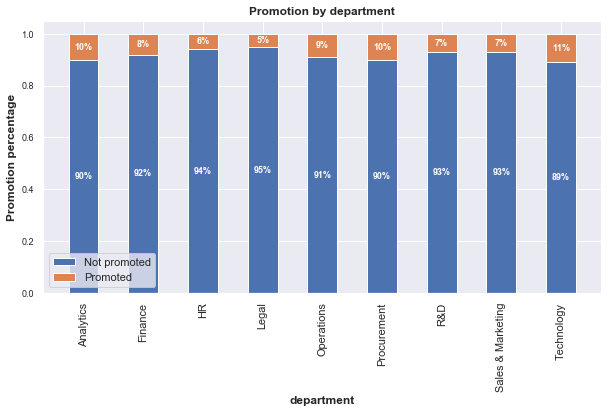

In [47]:
create_stacked_bar('department')


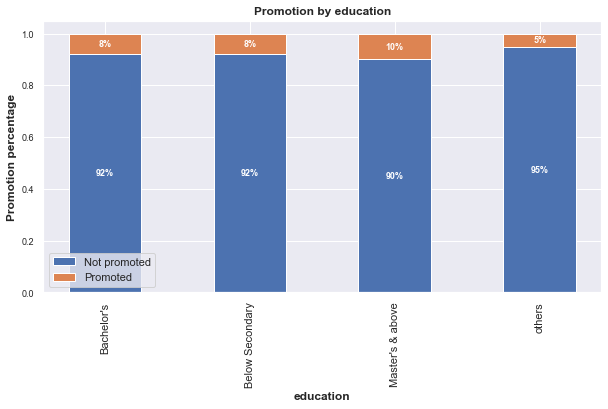

In [48]:
# Plot the percentage of promotion data by education

create_stacked_bar('education')

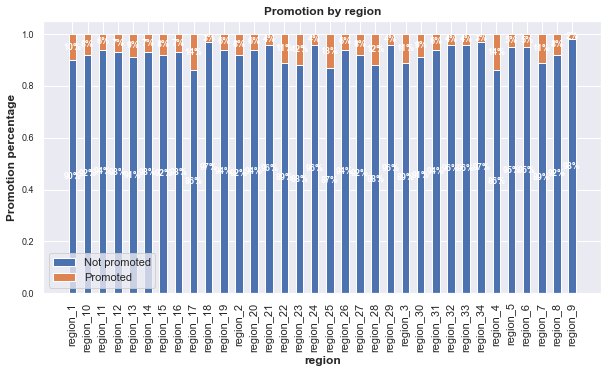

In [49]:
# Plot the percentage of promotion data by region

create_stacked_bar('region')

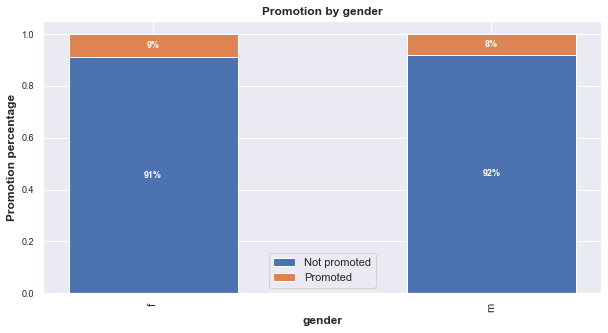

In [50]:
# Plot the percentage of promotion data by gender

create_stacked_bar('gender')

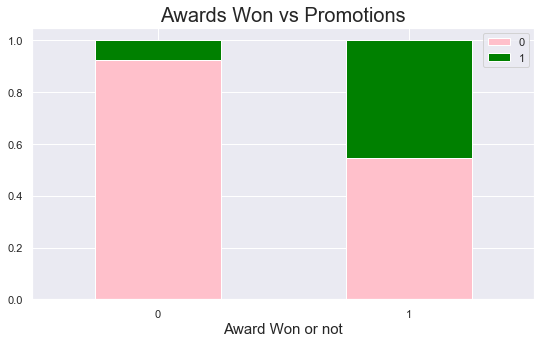

In [51]:
promotion = pd.crosstab(df['awards_won?'], df['is_promoted'])
promotion.div(promotion.sum(1).astype('float'), axis=0).plot(kind='bar', stacked=True, figsize=(9, 5), color=['pink', 'green'])

plt.title('Awards Won vs Promotions', fontsize=20)
plt.xticks(rotation=360)
plt.xlabel('Award Won or not', fontsize=15)
plt.legend()
plt.show()

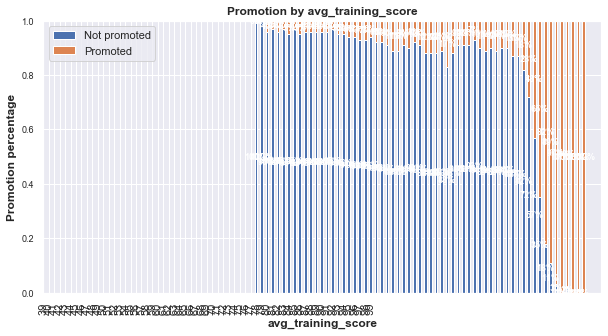

In [52]:
create_stacked_bar('avg_training_score')

In [53]:
data1 = df[df.is_promoted != 0]
#data1 is the data of promoted employees
data1["avg_training_score"].mean()

77.29812834224599

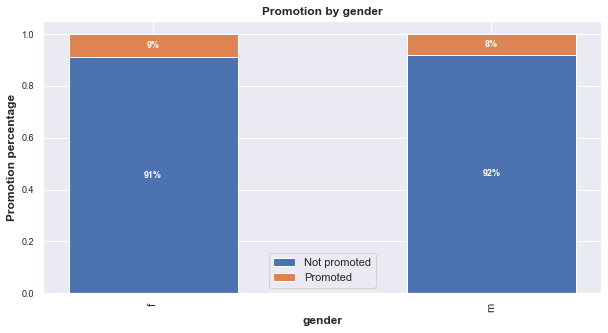

In [54]:
create_stacked_bar('gender')

In [55]:
gender_promotion_df = df.groupby(['gender', 'is_promoted']).agg({'employee_id': 'sum'})
gender_promotion_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

employee_id
gender is_promoted             
f      0              91.407241
       1               8.592759
m      0              91.545426
       1               8.454574

In [56]:
data2 = df[df.length_of_service == 1]
total_promotion = len(df.index)
fresher_promotion = len(data2.index)
prob_of_prom = fresher_promotion/total_promotion
prob_of_prom

0.010589677850852748

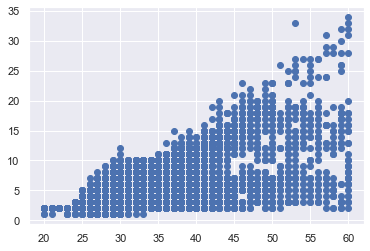

In [57]:
plt.scatter(df['age'],df['length_of_service'])
plt.show()


# Modeling Preparation

1. Feature Engineering

In [ ]:
def convert_age_to_group(df):
    df_copy = df.copy()
    bins = range(20,61,5)    # every 5 years as a bin
    labels = list(range(len(bins)-1))
    df_copy['age_group'] = pd.cut(df_copy['age'],bins=bins, labels=labels, right=True, include_lowest=True)
    df_copy.drop(columns=["age"], inplace=True)
    return df_copy

train_data = convert_age_to_group(train_data)
test_data = convert_age_to_group(test_data)

In [59]:
df. dropna()
train_data.dropna()
test_data.dropna()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,age_group
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,0.0,1,1,0,77,0
1,74430,HR,region_4,Bachelor's,f,other,1,3.0,5,0,0,51,2
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,1.0,4,0,0,47,2
3,38562,Procurement,region_2,Bachelor's,f,other,3,2.0,9,0,0,65,2
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,4.0,7,0,0,61,1
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,3.0,2,0,0,68,3
6,54542,Finance,region_2,Bachelor's,m,other,1,5.0,3,1,0,57,2
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,3.0,3,0,0,85,3
8,66174,Technology,region_7,Master's & above,m,other,1,4.0,11,0,0,75,6
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,5.0,2,1,0,76,1


In [60]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

def convert_to_numerical(df_train, df_test):
    df_train_copy = df_train.copy()
    df_test_copy = df_test.copy()
    
    for i in ["department", "region", "education", "gender", "recruitment_channel", "age_group"]:
        le = LabelEncoder()
        le.fit(df_train_copy.loc[:, i])
        df_train_copy.loc[:, i] = le.transform(df_train_copy.loc[:, i])
        df_test_copy.loc[:, i] = le.transform(df_test_copy.loc[:, i])
    
    return df_train_copy, df_test_copy

train_data, test_data = convert_to_numerical(train_data, test_data)

2. Feature Selection

In [61]:
# Define predictor variables and target variable
X = train_data.drop(columns=['is_promoted'])
y = train_data['is_promoted']

X_test = test_data.copy()

# Save all feature names as list
feature_cols = X.columns.tolist() 

# Extract numerical columns and save as a list for rescaling
num_cols = ['no_of_trainings', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score']

3. Split Training and Test Data

In [62]:
# Define function to split data with and without SMOTE 

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

def data_split(X, y, imbalance = False):
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3,shuffle=True, stratify=y, random_state=42)
    
    if imbalance:
        # use SMOTE to over sample data
        sm = SMOTE(random_state = 42)
        X_train, y_train = sm.fit_resample(X_train, y_train.ravel())
    
    return X_train, X_validation, y_train, y_validation

4. Rescale Features

In [63]:
# Define function to rescale training data using StandardScaler

from sklearn.preprocessing import StandardScaler

def standard_scaler(X_train, X_validation, X_test,  numerical_cols):
    
    # Make copies of dataset
    X_train_std = X_train.copy()
    X_validation_std = X_validation.copy()
    X_test_std = X_test.copy()
    
    # Apply standardization on numerical features only
    for i in numerical_cols:
        scl = StandardScaler().fit(X_train_std[[i]])     # fit on training data columns
        X_train_std[i] = scl.transform(X_train_std[[i]]) # transform the training data columns
        X_validation_std[i] = scl.transform(X_validation_std[[i]])   # transform the validation data columns
        X_test_std[i] = scl.transform(X_test_std[[i]])   # transform the test data columns

    return X_train_std, X_validation_std, X_test_std

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import joblib

Logistic Regression

In [65]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Split data with SMOTE 
X_train, X_validation, y_train, y_validation = data_split(X, y, imbalance = True)

# Rescale data
X_train_std, X_validation_std, X_test_std = standard_scaler(X_train, X_validation, X_test, numerical_cols = num_cols)

# Fit the model
logistic = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'])
lr_best = RandomizedSearchCV(logistic, distributions, random_state=42)

lr_best= lr_best.fit(X_train_std, y_train)   

print(lr_best.best_params_)


{'C': 0.0031150633640573133, 'penalty': 'l1'}


In [66]:
# Save tuned model and parameters

joblib.dump(lr_best,"logreg_tuned.pkl") 


['logreg_tuned.pkl']

In [67]:
# Get ROC_AUC score of tuned model on validation data

scores_tuned = cross_val_score(lr_best, X_validation_std, y_validation, scoring = "roc_auc", cv = 5)
roc_auc_lr_best = np.mean(scores_tuned)

# Save best ROC_AUC 
joblib.dump(roc_auc_lr_best,"logreg_ROC_AUC_tuned.pkl") 

print(f'ROC_AUC score after tuning parameters:{roc_auc_lr_best:.3f}')

ROC_AUC score after tuning parameters:0.497


Random Forest

In [68]:
from sklearn.model_selection import GridSearchCV

# Split data with SMOTE 
X_train, X_validation, y_train, y_validation = data_split(X, y, imbalance = True)

# Create parameter grid  
param_grid = {
    'max_depth': [60, 90, 110],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

# Instantiate the model
clf_rf = RandomForestClassifier(random_state=42)

# Instantiate grid search model
rf_best = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
rf_best.fit(X_train, y_train)
rf_best.best_params_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


{'max_depth': 60,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [69]:
joblib.dump(rf_best,"clf_rf_tuned.pkl") 

['clf_rf_tuned.pkl']

In [70]:
from sklearn.model_selection import GridSearchCV

# Split data with SMOTE 
X_train, X_validation, y_train, y_validation = data_split(X, y, imbalance = True)

# Create parameter grid  
param_grid = {
    'max_depth': [50,60,70],
    'min_samples_leaf': [2,3],
    'min_samples_split': [6,7,8],
    'n_estimators': [200,300,400]
}

# Instantiate the model
clf_rf = RandomForestClassifier(random_state=42)

# Instantiate grid search model
rf_best1 = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
                          cv = 3, n_jobs = -1, verbose = 1)

# Fit grid search to the data
rf_best1.fit(X_train, y_train)
rf_best1.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'max_depth': 50,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 300}

In [71]:
# Get ROC_AUC score of tuned model on validation data

scores_tuned = cross_val_score(rf_best1, X_validation, y_validation, scoring = "roc_auc", cv = 5)
roc_auc_rf_best = np.mean(scores_tuned)

# Save best ROC_AUC 
joblib.dump(roc_auc_rf_best,"rf_ROC_AUC_tuned.pkl") 

print(f'ROC_AUC score after tuning parameters:{roc_auc_rf_best:.2f}')

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Fitting 3 folds for each of 54 candidates, totalling 162 fits
ROC_AUC score after tuning parameters:0.876


Model Performance Evaluation

In [72]:
# Define a function to compute Precision, Recall and F1 score

from sklearn.metrics import confusion_matrix

def get_pre_rec_f1(model_name, model,X_validation,y_validation):
    y_pred = model.predict(X_validation)
    tn, fp, fn, tp = confusion_matrix(y_validation, y_pred).ravel()
    
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    F1 = 2 * (precision * recall) / (precision + recall)
    
    return [model_name, precision, recall, F1]

In [73]:
# Logistic Regression model performance on validation data:
col_1 = get_pre_rec_f1("Logistic", lr_best, X_validation_std, y_validation)

# Random Forest model performance on validation data:
col_2 = get_pre_rec_f1("Random Forest",  rf_best1, X_validation, y_validation)

result = []
result.append(col_1)
result.append(col_2)

pd.DataFrame(result, columns = ["Model", "Precision", "Recall", "F1"])

,Model,Precision,Recall,F1
0,Logistic,0.117320,0.331429,0.173296
1,Random Forest,0.514039,0.340000,0.409286


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


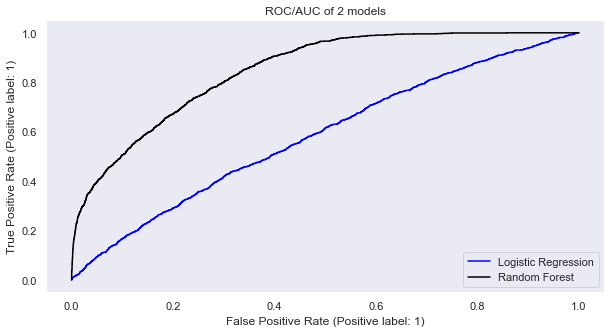

In [74]:
# Plot ROC_AUC curve of 3 models

from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve

fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(lr_best, X_validation_std, y_validation,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(rf_best1, X_validation, y_validation,ax=ax, color="black",label='Random Forest')

plt.title('ROC/AUC of 2 models')
plt.grid()

The Model with best F1 is Random Forest